In [1]:
# Akshay B
# 13-Aug-2025
# The code is used for exploratory data analysis for the job trend 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

In [3]:
jobs_raw = pd.read_csv('/home/rudra/My_Repo/Job_marketing_intelligence/postings.csv') # reading the dataset

In [4]:
jobs_raw.tail()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,...,NaN,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,NaN,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN,NaN,99201.0,53063.0
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,NaN,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
123848,3906267224,Solugenix,Marketing Social Media Specialist,Marketing Social Media Specialist - $70k – $75...,75000.0,YEARLY,"San Juan Capistrano, CA",43325.0,2.0,NaN,...,NaN,1.713573e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,72500.0,92675.0,6059.0


In [5]:
jobs_raw.shape

(123849, 31)

In [6]:
jobs_raw.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips'],
      dtype='object')

In [7]:
jobs_raw.isnull().sum()  

# title
# description
# location
# formatted_work_type
# formatted_experience_level
# remote_allowed
# listed_time


job_id                             0
company_name                    1719
title                              0
description                        7
max_salary                     94056
pay_period                     87776
location                           0
company_id                      1717
views                           1689
med_salary                    117569
min_salary                     94056
formatted_work_type                0
applies                       100529
original_listed_time               0
remote_allowed                108603
job_posting_url                    0
application_url                36665
application_type                   0
expiry                             0
closed_time                   122776
formatted_experience_level     29409
skills_desc                   121410
listed_time                        0
posting_domain                 39968
sponsored                          0
work_type                          0
currency                       87776
c

In [8]:
jobs_raw['formatted_experience_level'] = jobs_raw['formatted_experience_level'].fillna("Unknown")

In [9]:
jobs_raw['remote_allowed'] = jobs_raw['remote_allowed'].fillna("Unknown")

In [10]:
jobs_salary = jobs_raw[['company_name','title','location','formatted_experience_level','min_salary','max_salary']]

In [11]:
# jobs_salary = jobs_salary.dropna(subset=['company_name','min_salary','max_salary'])
jobs_salary = jobs_salary.dropna()

In [12]:
jobs_salary.isnull().sum()

company_name                  0
title                         0
location                      0
formatted_experience_level    0
min_salary                    0
max_salary                    0
dtype: int64

In [13]:
jobs_salary.shape

(29338, 6)

In [14]:
jobs_salary

,company_name,title,location,formatted_experience_level,min_salary,max_salary
0,Corcoran Sawyer Smith,Marketing Coordinator,"Princeton, NJ",Unknown,17.0,20.0
2,The National Exemplar,Assitant Restaurant Manager,"Cincinnati, OH",Unknown,45000.0,65000.0
3,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,"New Hyde Park, NY",Unknown,140000.0,175000.0
5,Downtown Raleigh Alliance,Economic Development and Planning Intern,"Raleigh, NC",Unknown,14.0,20.0
6,Raw Cereal,Producer,United States,Unknown,60000.0,300000.0
...,...,...,...,...,...,...
123837,"TalentBurst, an Inc 5000 company",Contract Administrator,"Irvine, CA",Mid-Senior level,35.0,45.0
123839,Athena Recruiting,Catering Event Manager,Greater Indianapolis,Associate,50000.0,65000.0
123843,"TalentBurst, an Inc 5000 company",Quality Engineer,"Irvine, CA",Mid-Senior level,30.0,50.0
123844,Lozano Smith,Title IX/Investigations Attorney,"Walnut Creek, CA",Mid-Senior level,120000.0,195000.0


In [15]:
jobs_selected = jobs_raw[['title' ,'location','description','formatted_experience_level','remote_allowed','listed_time']]

In [16]:
jobs_selected.isnull().sum()

title                         0
location                      0
description                   7
formatted_experience_level    0
remote_allowed                0
listed_time                   0
dtype: int64

In [17]:
jobs_selected.shape

(123849, 6)

In [18]:
jobs_selected = jobs_selected.dropna()

In [19]:
jobs_selected.shape

(123842, 6)

In [20]:
jobs_selected.isnull().sum()

title                         0
location                      0
description                   0
formatted_experience_level    0
remote_allowed                0
listed_time                   0
dtype: int64

In [21]:
jobs_selected.duplicated().sum()

1230

In [22]:
jobs_selected = jobs_selected.drop_duplicates()

In [23]:
jobs_selected.duplicated().sum()

0

In [24]:
bar_graph = jobs_selected['title'].value_counts().head(15)

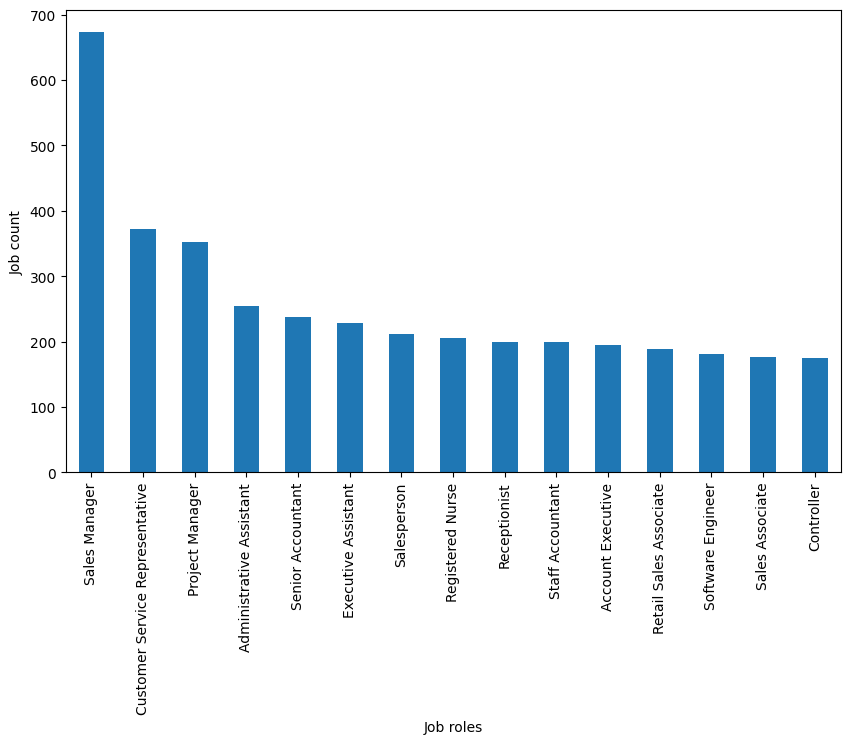

In [25]:
bar_graph.plot.bar(figsize=(10,6))
plt.xlabel("Job roles")
plt.ylabel("Job count")
plt.show()

In [26]:
min_salary_by_title = jobs_salary.groupby('title')['min_salary'].min()
max_salary_by_title = jobs_salary.groupby('title')['max_salary'].max()


In [27]:
jobs_salary['max_salary'].max()

120000000.0

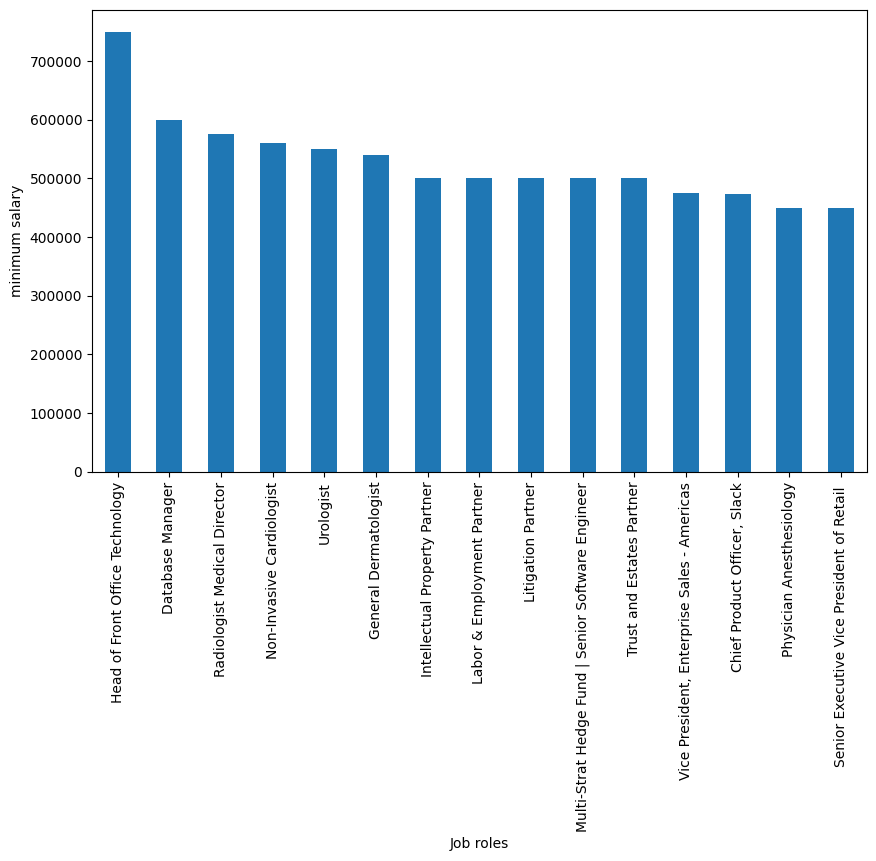

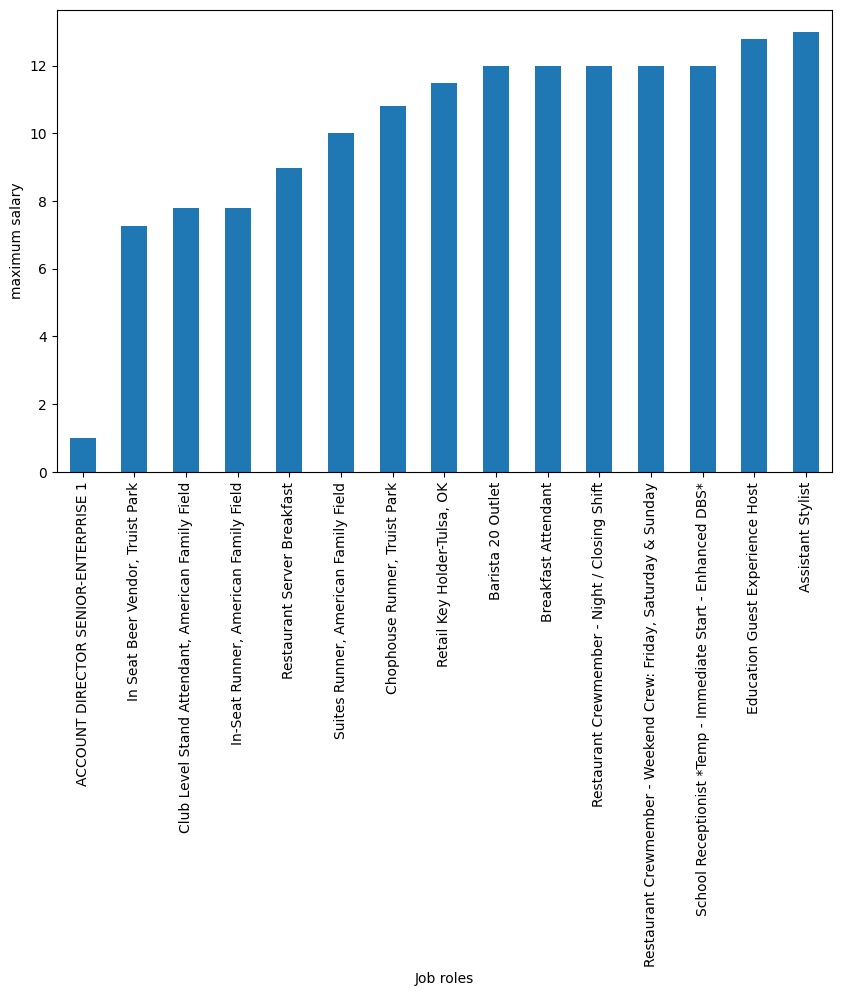

In [28]:
min_salary_by_title.nlargest(15).plot.bar(figsize=(10,6))
plt.xlabel("Job roles")
plt.ylabel("minimum salary")
plt.show()

max_salary_by_title.nsmallest(15).plot.bar(figsize=(10,6))
plt.xlabel("Job roles")
plt.ylabel("maximum salary")
plt.show()

In [29]:
jobs_salary.groupby('title')['min_salary'].min().head(10)

title
\tPublic Figure Protection / Executive Protection Team Lead     55000.00
\tSupervisor Clinic Operations                                     22.55
  Data Architect                                                 8130.00
 AVP Underwriter                                                  150.00
 Accounts Receivable Specialist                                 55000.00
 Azure Data Architect                                              75.00
 BigCommerce Architect                                         120000.00
 CAE Engineer- NVH                                                 45.00
 Claims Analyst                                                    24.00
 Cybersecurity Threat Hunter                                   110000.00
Name: min_salary, dtype: float64

In [30]:
remote_pie_chart = jobs_selected['remote_allowed'].value_counts()

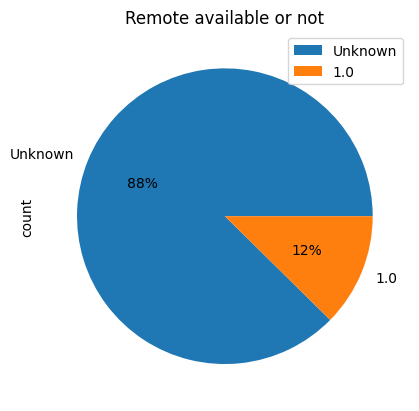

In [31]:
remote_pie_chart.plot.pie(autopct='%1.0f%%',legend=True)
plt.title("Remote available or not")
plt.show()

In [32]:
remote_pie_chart

remote_allowed
Unknown    107437
1.0         15175
Name: count, dtype: int64

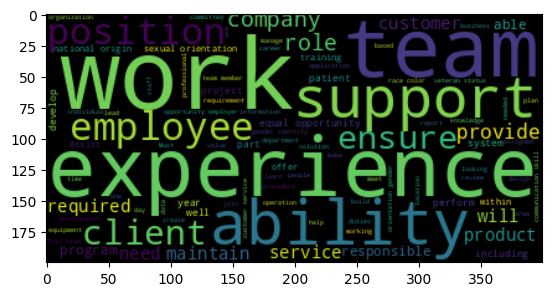

In [33]:
text = " ".join(jobs_selected['description'].dropna().sample(10000, random_state=42).astype(str))
wc = WordCloud().generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.show()

In [34]:
jobs_salary

,company_name,title,location,formatted_experience_level,min_salary,max_salary
0,Corcoran Sawyer Smith,Marketing Coordinator,"Princeton, NJ",Unknown,17.0,20.0
2,The National Exemplar,Assitant Restaurant Manager,"Cincinnati, OH",Unknown,45000.0,65000.0
3,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,"New Hyde Park, NY",Unknown,140000.0,175000.0
5,Downtown Raleigh Alliance,Economic Development and Planning Intern,"Raleigh, NC",Unknown,14.0,20.0
6,Raw Cereal,Producer,United States,Unknown,60000.0,300000.0
...,...,...,...,...,...,...
123837,"TalentBurst, an Inc 5000 company",Contract Administrator,"Irvine, CA",Mid-Senior level,35.0,45.0
123839,Athena Recruiting,Catering Event Manager,Greater Indianapolis,Associate,50000.0,65000.0
123843,"TalentBurst, an Inc 5000 company",Quality Engineer,"Irvine, CA",Mid-Senior level,30.0,50.0
123844,Lozano Smith,Title IX/Investigations Attorney,"Walnut Creek, CA",Mid-Senior level,120000.0,195000.0


In [35]:
jobs_selected

,title,location,description,formatted_experience_level,remote_allowed,listed_time
0,Marketing Coordinator,"Princeton, NJ",Job descriptionA leading real estate firm in N...,Unknown,Unknown,1.713398e+12
1,Mental Health Therapist/Counselor,"Fort Collins, CO","At Aspen Therapy and Wellness , we are committ...",Unknown,Unknown,1.712858e+12
2,Assitant Restaurant Manager,"Cincinnati, OH",The National Exemplar is accepting application...,Unknown,Unknown,1.713278e+12
3,Senior Elder Law / Trusts and Estates Associat...,"New Hyde Park, NY",Senior Associate Attorney - Elder Law / Trusts...,Unknown,Unknown,1.712896e+12
4,Service Technician,"Burlington, IA",Looking for HVAC service tech with experience ...,Unknown,Unknown,1.713452e+12
...,...,...,...,...,...,...
123844,Title IX/Investigations Attorney,"Walnut Creek, CA",Our Walnut Creek office is currently seeking a...,Mid-Senior level,Unknown,1.713571e+12
123845,"Staff Software Engineer, ML Serving Platform",United States,About Pinterest:\n\nMillions of people across ...,Mid-Senior level,1.0,1.713572e+12
123846,"Account Executive, Oregon/Washington","Spokane, WA",Company Overview\n\nEPS Learning is a leading ...,Mid-Senior level,1.0,1.713572e+12
123847,Business Development Manager,"Texas, United States",The Business Development Manager is a 'hunter'...,Unknown,1.0,1.713573e+12


In [36]:
experience_level_pie = jobs_salary['formatted_experience_level'].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

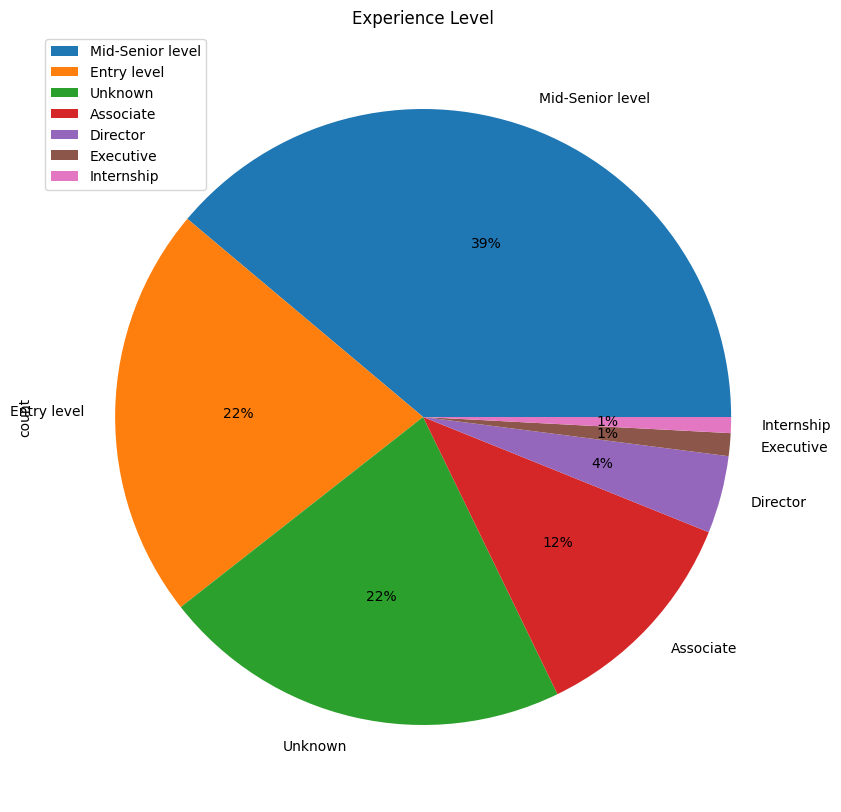

In [37]:
experience_level_pie.plot.pie(figsize=(10,10),autopct='%1.0f%%',legend=True)
plt.title("Experience Level")
plt.show

In [38]:
le = LabelEncoder()
jobs_salary['formatted_experience_level_encoded'] = le.fit_transform(jobs_salary['formatted_experience_level'])

In [39]:
jobs_salary

,company_name,title,location,formatted_experience_level,min_salary,max_salary,formatted_experience_level_encoded
0,Corcoran Sawyer Smith,Marketing Coordinator,"Princeton, NJ",Unknown,17.0,20.0,6
2,The National Exemplar,Assitant Restaurant Manager,"Cincinnati, OH",Unknown,45000.0,65000.0,6
3,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,"New Hyde Park, NY",Unknown,140000.0,175000.0,6
5,Downtown Raleigh Alliance,Economic Development and Planning Intern,"Raleigh, NC",Unknown,14.0,20.0,6
6,Raw Cereal,Producer,United States,Unknown,60000.0,300000.0,6
...,...,...,...,...,...,...,...
123837,"TalentBurst, an Inc 5000 company",Contract Administrator,"Irvine, CA",Mid-Senior level,35.0,45.0,5
123839,Athena Recruiting,Catering Event Manager,Greater Indianapolis,Associate,50000.0,65000.0,0
123843,"TalentBurst, an Inc 5000 company",Quality Engineer,"Irvine, CA",Mid-Senior level,30.0,50.0,5
123844,Lozano Smith,Title IX/Investigations Attorney,"Walnut Creek, CA",Mid-Senior level,120000.0,195000.0,5


In [40]:
# Maximum  salary by experience

jobs_salary.groupby('formatted_experience_level').max_salary.max()

formatted_experience_level
Associate              800000.0
Director              1000000.0
Entry level            640037.0
Executive             1000001.0
Internship             300000.0
Mid-Senior level      1220000.0
Unknown             120000000.0
Name: max_salary, dtype: float64

In [41]:
jobs_salary[['formatted_experience_level', 'formatted_experience_level_encoded']].drop_duplicates().sort_values('formatted_experience_level_encoded')


,formatted_experience_level,formatted_experience_level_encoded
101,Associate,0
460,Director,1
109,Entry level,2
867,Executive,3
863,Internship,4
85,Mid-Senior level,5
0,Unknown,6
